In [1]:
import json
import requests
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (12, 6)

In [4]:
# get the information for all player propects
r = requests.get("http://m.mlb.com/gen/players/prospects/2018/playerProspects.json")

In [5]:
# write JSON data
with open('2018_mlb_prospect_players.json', 'w') as f:
    json.dump(r.text, f)

In [6]:
# read in JSON data
prospects = json.loads(json.load(open('2018_mlb_prospect_players.json')))

In [7]:
# inspect the keys in the data
prospects.keys()

dict_keys(['prospect_players', 'year', 'last_updated'])

In [8]:
# inspect the prospects
print("Last Updated: {}".format(prospects['last_updated']))
print("Year: {}".format(prospects['year']))

Last Updated: 2018-03-11T16:28:18.753Z
Year: 2018


In [9]:
# look at the keys in prospect_players
prospects['prospect_players'].keys()

dict_keys(['kc', 'bal', 'atl', 'mil', 'chc', 'lhp', '3b', 'tex', 'sf', 'bos', 'ss', 'draft', 'col', 'cin', 'tb', 'nyy', 'det', 'ana', 'prospects', 'cle', '1b', 'tor', 'cws', 'c', 'sd', 'sea', 'rhp', 'pit', 'hou', 'stl', 'mia', 'phi', 'was', '2b', 'nym', 'oak', 'of', 'min', 'la', 'ari'])

In [10]:
# look at the keys for the first player of a team
prospects['prospect_players']['bos'][0]

{'photo180x218': '/assets/images/7/5/8/264702758/cuts/180x218/cut.jpg',
 'photo360x436': '/assets/images/7/5/8/264702758/cuts/360x436/cut.jpg',
 'player_first_name': 'Michael',
 'player_id': 656308,
 'player_last_name': 'Chavis',
 'position': '3B',
 'preseason100': '',
 'preseason20': 1,
 'prospect_year': '2018',
 'rank': 1,
 'team_file_code': 'BOS',
 'thumb': '/assets/images/7/5/8/264702758/cuts/74x74/cut.jpg',
 'thumb124x150': '/assets/images/7/5/8/264702758/cuts/124x150/cut.jpg',
 'thumb62x75': '/assets/images/7/5/8/264702758/cuts/62x75/cut.jpg'}

In [11]:
# iterate over prospects players and pull out data
players = []
for team in prospects['prospect_players']:
    players.extend(prospects['prospect_players'][team])

In [12]:
# count how many players there are
len(players)

1130

In [13]:
# look at one player
players[0]

{'photo180x218': '/assets/images/5/0/0/264120500/cuts/180x218/cut.jpg',
 'photo360x436': '/assets/images/5/0/0/264120500/cuts/360x436/cut.jpg',
 'player_first_name': 'Khalil',
 'player_id': 666137,
 'player_last_name': 'Lee',
 'position': 'OF',
 'preseason100': '',
 'preseason20': 1,
 'prospect_year': '2018',
 'rank': 1,
 'team_file_code': 'KC',
 'thumb': '/assets/images/5/0/0/264120500/cuts/74x74/cut.jpg',
 'thumb124x150': '/assets/images/5/0/0/264120500/cuts/124x150/cut.jpg',
 'thumb62x75': '/assets/images/5/0/0/264120500/cuts/62x75/cut.jpg'}

In [14]:
# load players into DataFrame
df = pd.DataFrame(players)

In [15]:
# inspect the DataFrame
df.head()

,photo180x218,photo360x436,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code,thumb,thumb124x150,thumb62x75
0,/assets/images/5/0/0/264120500/cuts/180x218/cu...,/assets/images/5/0/0/264120500/cuts/360x436/cu...,Khalil,666137,Lee,OF,,1,2018,1,KC,/assets/images/5/0/0/264120500/cuts/74x74/cut.jpg,/assets/images/5/0/0/264120500/cuts/124x150/cu...,/assets/images/5/0/0/264120500/cuts/62x75/cut.jpg
1,/assets/images/6/2/4/264187624/cuts/180x218/cu...,/assets/images/6/2/4/264187624/cuts/360x436/cu...,Nick,668472,Pratto,1B,,2,2018,2,KC,/assets/images/6/2/4/264187624/cuts/74x74/cut.jpg,/assets/images/6/2/4/264187624/cuts/124x150/cu...,/assets/images/6/2/4/264187624/cuts/62x75/cut.jpg
2,/assets/images/0/3/6/244123036/cuts/Matias_6qg...,/assets/images/0/3/6/244123036/cuts/Matias_6qg...,Seuly,665890,Matias,OF,,3,2018,3,KC,/assets/images/0/3/6/244123036/cuts/Matias_6qg...,/assets/images/0/3/6/244123036/cuts/Matias_6qg...,/assets/images/0/3/6/244123036/cuts/Matias_6qg...
3,/assets/images/7/0/0/264121700/cuts/180x218/cu...,/assets/images/7/0/0/264121700/cuts/360x436/cu...,MJ,669004,Melendez,C,,4,2018,4,KC,/assets/images/7/0/0/264121700/cuts/74x74/cut.jpg,/assets/images/7/0/0/264121700/cuts/124x150/cu...,/assets/images/7/0/0/264121700/cuts/62x75/cut.jpg
4,/assets/images/8/4/6/266443846/cuts/180x218/cu...,/assets/images/8/4/6/266443846/cuts/360x436/cu...,Michael,669377,Gigliotti,OF,,5,2018,5,KC,/assets/images/8/4/6/266443846/cuts/74x74/cut.jpg,/assets/images/8/4/6/266443846/cuts/124x150/cu...,/assets/images/8/4/6/266443846/cuts/62x75/cut.jpg


In [16]:
# define unneeded columns to drop
cols = ['photo180x218', 'photo360x436', 'thumb', 'thumb124x150', 'thumb62x75']

# drop columns
df.drop(cols, axis=1, inplace=True)

In [17]:
# inspect the DataFrame
df.head()

,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code
0,Khalil,666137,Lee,OF,,1,2018,1,KC
1,Nick,668472,Pratto,1B,,2,2018,2,KC
2,Seuly,665890,Matias,OF,,3,2018,3,KC
3,MJ,669004,Melendez,C,,4,2018,4,KC
4,Michael,669377,Gigliotti,OF,,5,2018,5,KC


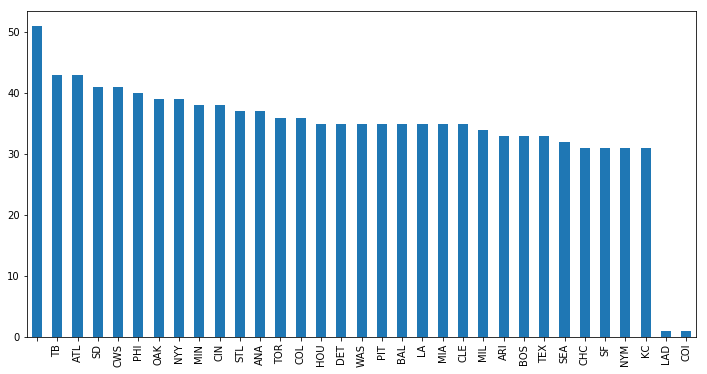

In [18]:
# count the number of players per team
df['team_file_code'].value_counts().plot('bar')

In [19]:
# write players to CSV
df.to_csv('2018_mlb_prospect_players.csv', index=False)